In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("StudentPerformanceFactors_Cleaned.csv")

# Tests on Exam Score
 - Random Forest : error / accuracy (R^2) / feature importance
 - PCA 2 and 3 dimensions

In [4]:
# Convert categorical columns to numerical values
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use if needed
df

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,1,69,0,2,1,6,97,2,1,...,1,2,1,2,3,0,1,2,0,61
1,1,1,81,2,2,1,8,66,2,1,...,1,2,1,0,2,0,0,2,1,60
2,2,1,88,2,0,1,4,72,0,1,...,2,2,0,0,2,0,0,2,1,92
3,3,2,67,2,2,0,6,73,1,1,...,1,2,0,2,2,0,0,1,1,58
4,6,2,98,0,2,0,4,64,2,1,...,1,0,0,1,2,0,1,2,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,6608,39,92,2,2,0,9,73,2,1,...,2,2,1,0,4,0,2,1,1,75
6374,6609,39,95,2,0,1,9,54,0,1,...,2,2,0,2,3,0,1,1,1,77
6375,6610,39,97,0,0,1,10,91,2,1,...,1,2,1,2,3,0,1,1,0,79
6376,6611,43,86,0,2,1,7,97,2,1,...,2,0,1,2,1,0,1,2,0,78


In [5]:
# Random Forest 
def forest_test(X, Y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    # feature importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Feature Importances:")
    print(feature_importances)

    # Plot a single decision tree from the Random Forest model
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, max_depth=3)
    plt.title("Sample Decision Tree from Random Forest")
    plt.show()

def PCA_test(X, y=None, dimension=2, scale_data=True, title="PCA of Dataset", color_map='viridis', label=None):
    if dimension not in [2, 3]:
        raise ValueError("Dimension must be 2 or 3.")

    # Scale the data if scale_data is True
    if scale_data:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    # Apply PCA
    pca = PCA(n_components=dimension)
    X_pca = pca.fit_transform(X_scaled)

    # Plotting based on the dimension
    if dimension == 2:
        plt.figure(figsize=(10, 7))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=color_map, edgecolor='k', s=50) if y is not None else plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50)
        if y is not None:
            plt.colorbar(scatter, label=label or 'Target')
        plt.title(f"{title} (2D)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()
    else:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=color_map, edgecolor='k', s=50) if y is not None else ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], edgecolor='k', s=50)
        if y is not None:
            fig.colorbar(scatter, label=label or 'Target')
        ax.set_title(f"{title} (3D)")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
        plt.show()




Mean Squared Error: 6.29
R^2 Score: 0.61
Feature Importances:
Attendance                    0.361545
Unnamed: 0                    0.307103
Previous_Scores               0.080544
Tutoring_Sessions             0.032695
Access_to_Resources           0.025263
Parental_Involvement          0.023596
Physical_Activity             0.022297
Sleep_Hours                   0.019791
Hours_Studied                 0.016791
Family_Income                 0.015807
Distance_from_Home            0.015512
Parental_Education_Level      0.013074
Peer_Influence                0.012453
Motivation_Level              0.011016
Teacher_Quality               0.010219
Internet_Access               0.008420
Learning_Disabilities         0.008353
School_Type                   0.006168
Extracurricular_Activities    0.005271
Gender                        0.004080
dtype: float64


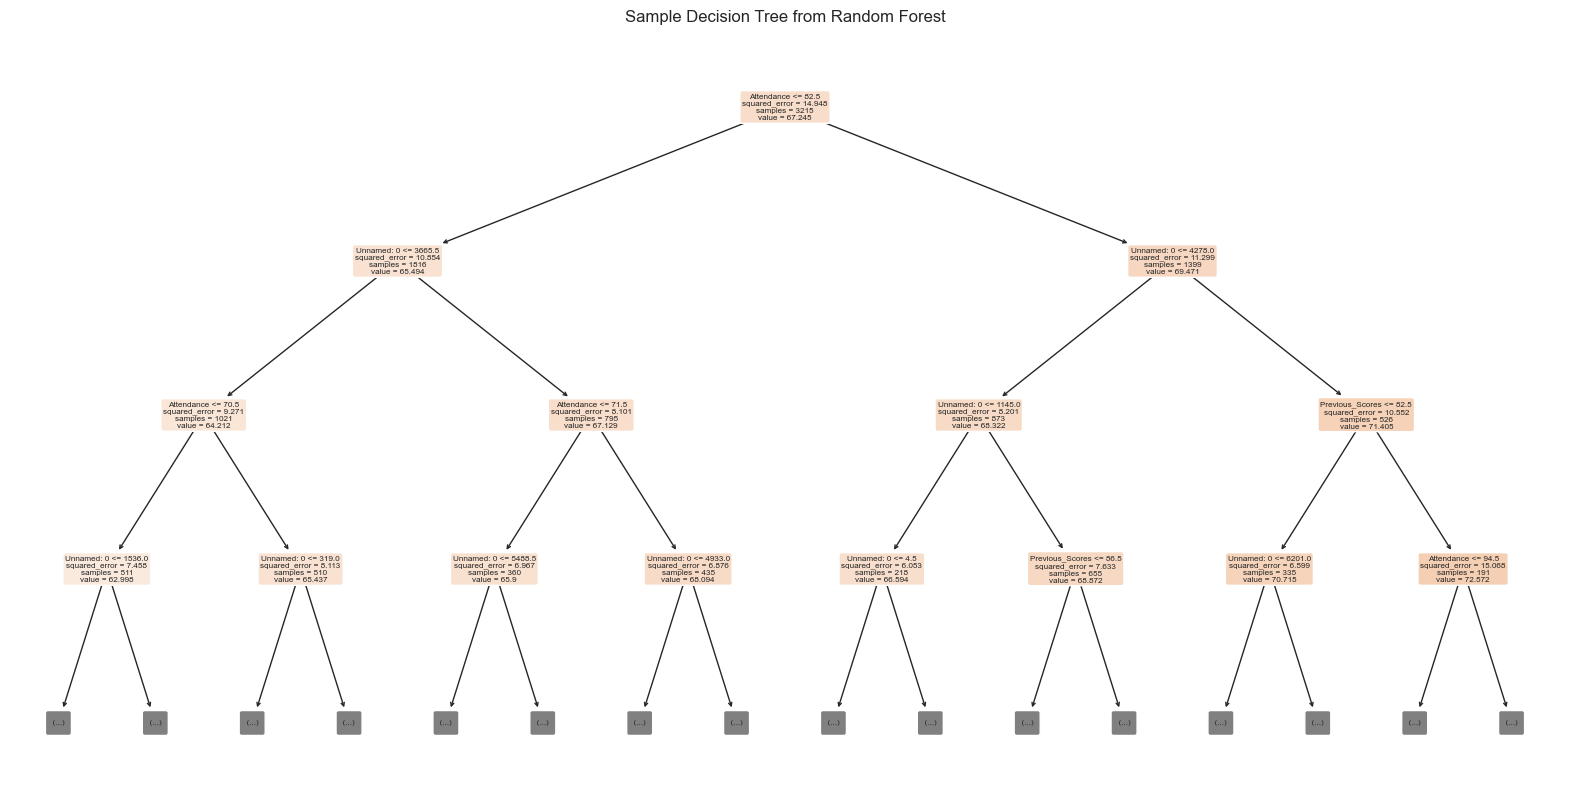

In [6]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

forest_test(X,y)


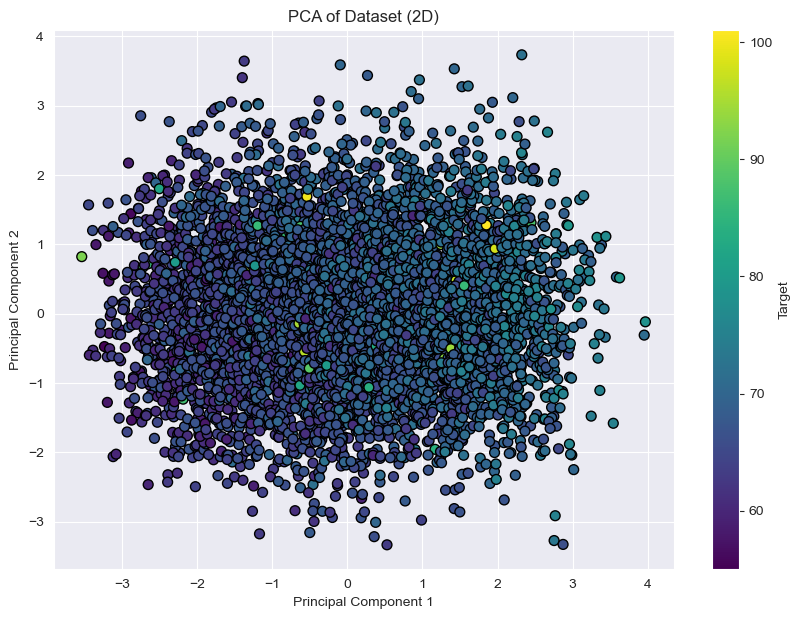

In [7]:
# PCA 2
PCA_test(X,y, 2)


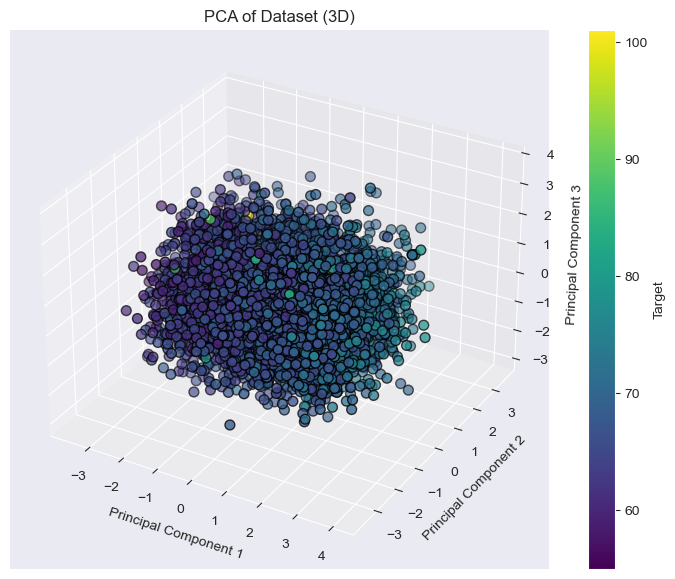

In [8]:
#PCA 3
PCA_test(X,y,3)